In [1]:
import matplotlib.pyplot as plt
from synthetic_information_spread_experiments import ExperimentResult
import networkx as nx

with open("../results/synthetic_5_bdi_is.json", "r") as f:
    result5 = ExperimentResult.model_validate_json(f.read())
with open("../results/synthetic_5_bdi_is_reduced.json", "r") as f:
    result5_reduced = ExperimentResult.model_validate_json(f.read())
with open("../results/synthetic_5_bdi_is_reduced_prompt.json", "r") as f:
    result5_reduced_prompt = ExperimentResult.model_validate_json(f.read())
with open("../results/synthetic_5_bdi_is_simple.json", "r") as f:
    result5_simple = ExperimentResult.model_validate_json(f.read())

with open("../results/synthetic_10_bdi_is.json", "r") as f:
    result10 = ExperimentResult.model_validate_json(f.read())

with open('../results/synthetic_25_bdi_is.json', 'r') as f:
    result25 = ExperimentResult.model_validate_json(f.read())

In [2]:
def get_networkx_name_graph(result: ExperimentResult):
    G = nx.Graph()
    G.add_edges_from(
        (
            (result.dataset.agents[u].full_name, result.dataset.agents[v].full_name)
            for (u, v) in result.dataset.edges
        )
    )
    return G

result5_graph = get_networkx_name_graph(result5)

result10_graph = get_networkx_name_graph(result10)

result25_graph = get_networkx_name_graph(result25)

In [3]:
result5_pos = nx.spring_layout(result5_graph)
result10_pos = nx.spring_layout(result10_graph)
result25_pos = nx.spring_layout(result25_graph)

#TODO: introvert vs extrovert

def process_experiment(result: ExperimentResult, graph: nx.Graph, pos):
    # print plot on the number of agents knowing the answer
    x = list(range(len(result.epoch_agents_responses)))
    y = [
        sum(1 for response in epoch if response.final_answer) for epoch in result.epoch_agents_responses
    ]
    plt.bar(x, y, color='skyblue')
    plt.xlabel('Epoch')
    plt.ylabel('Number of Agents Knowing the Answer')
    plt.title(f"Number of Agents Knowing the Answer Over Epochs - {len(result.dataset.agents)} Agents")
    plt.xticks(x, [f'{i + 1}' for i in x])
    plt.show()

    for epoch in range(len(result.epoch_agents_responses)):
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        nx.draw(
            graph,
            pos=pos,
            with_labels=True,
            node_size=500,
            node_color="lightblue",
            font_size=10,
            font_color="black",
            edge_color="gray",
        )
        plt.title(
            f"{len(result.dataset.agents)} Agents - Information Spread - Epoch {epoch + 1}"
        )
        # mark some node with red color
        for node_id, answer in enumerate(result.epoch_agents_responses[epoch]):
            if answer.final_answer:
                nx.draw_networkx_nodes(
                    graph,
                    pos=pos,
                    nodelist=[result.dataset.agents[node_id].full_name],
                    node_color="red",
                    node_size=500,
                )
        plt.show()



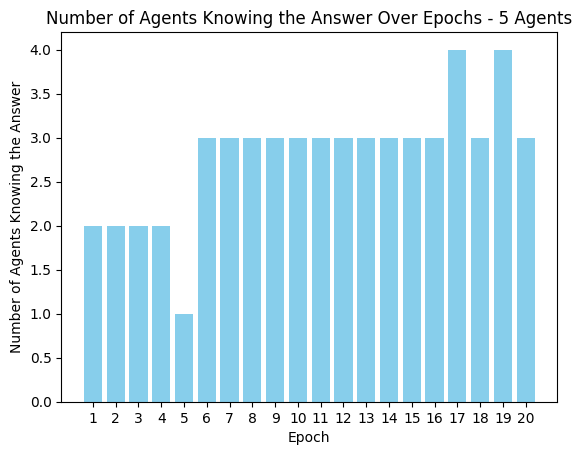

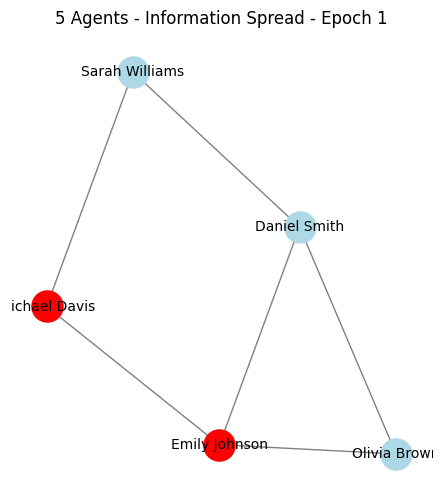

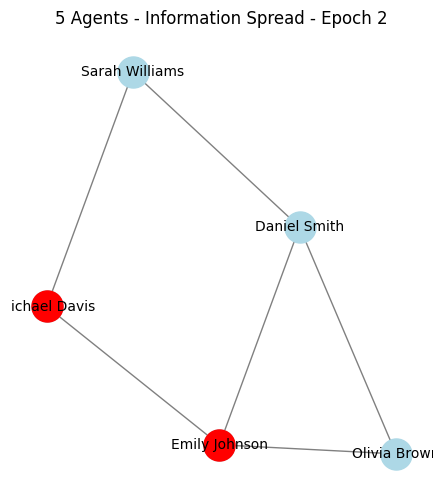

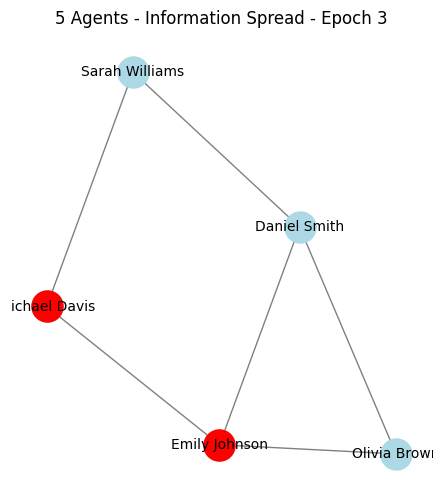

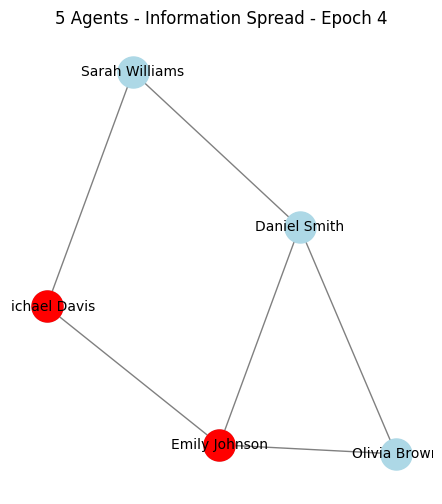

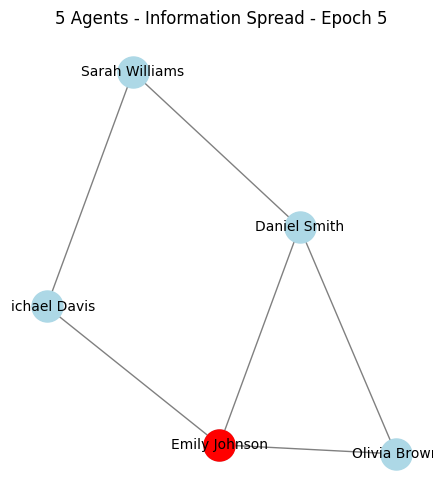

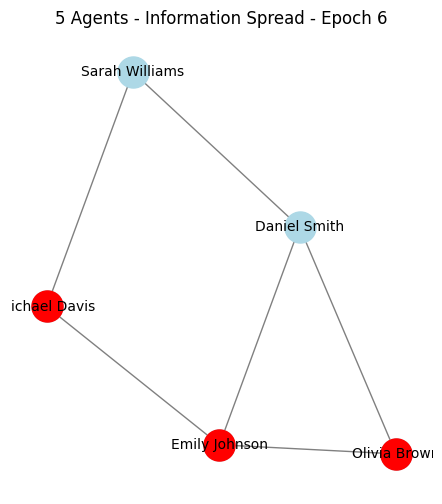

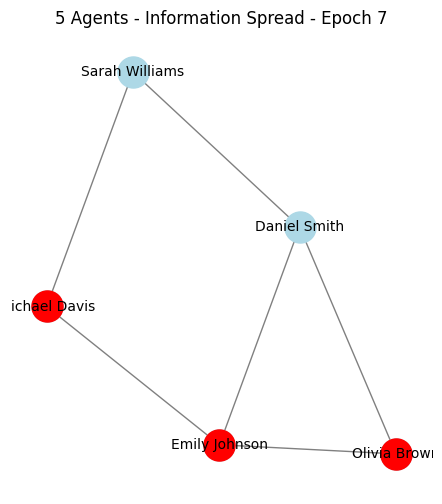

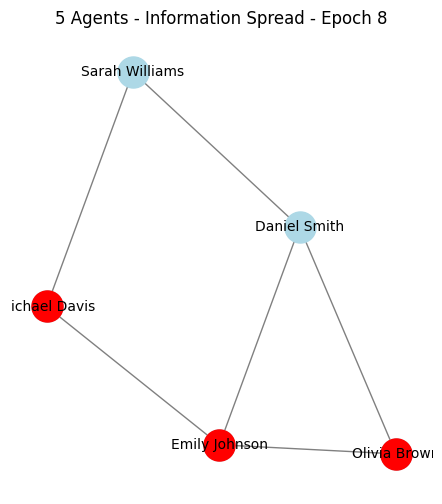

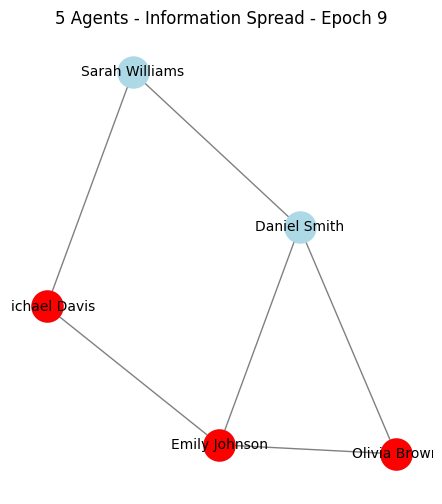

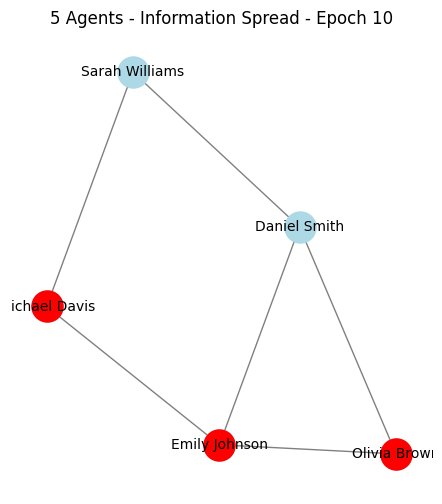

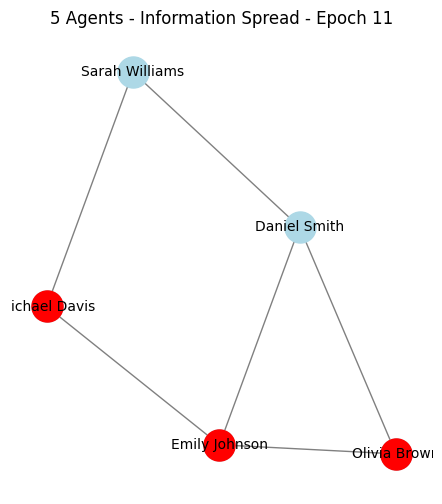

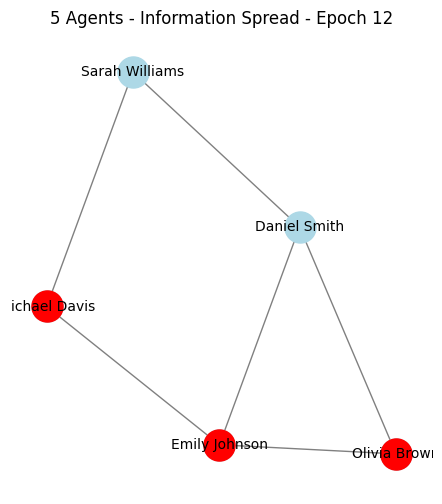

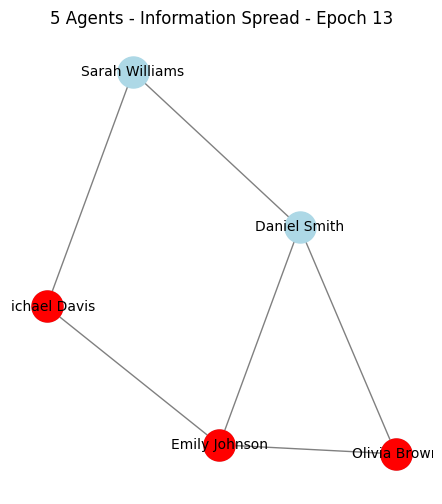

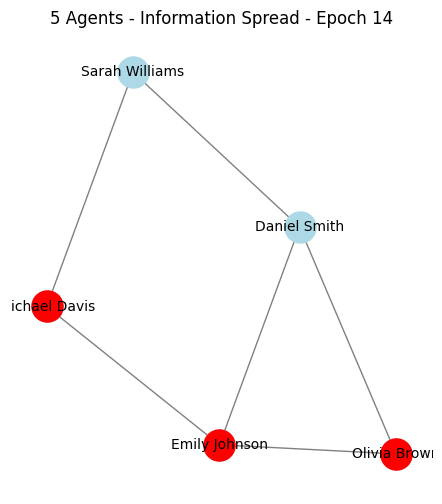

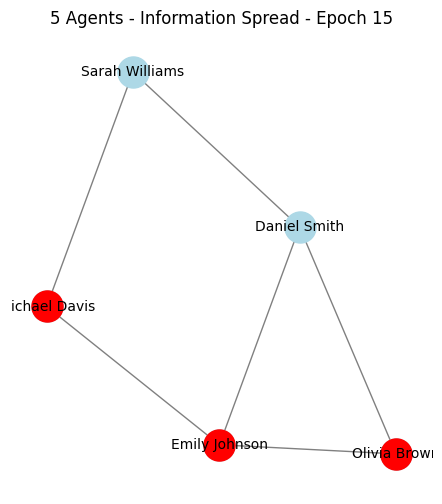

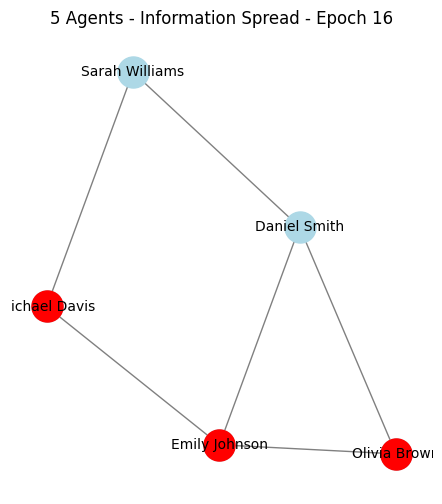

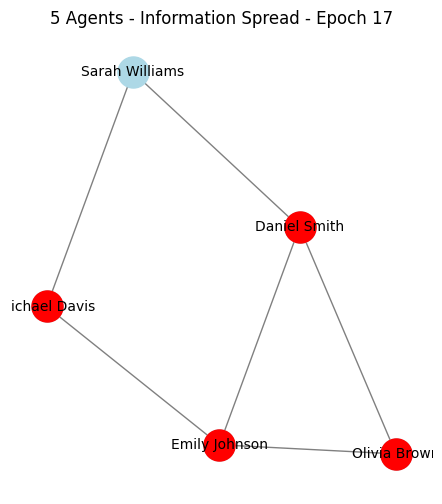

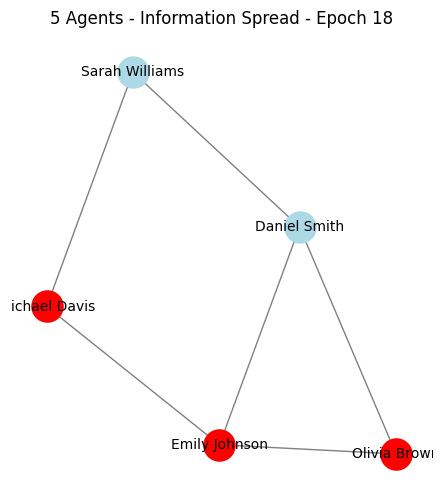

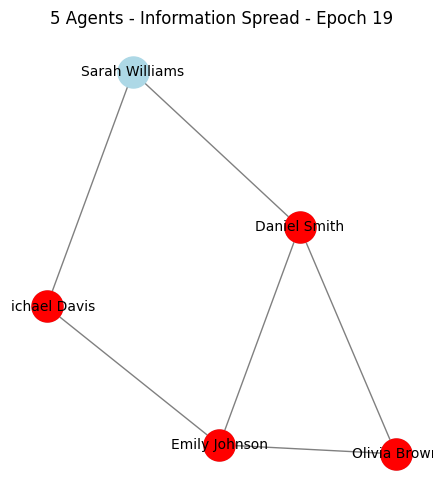

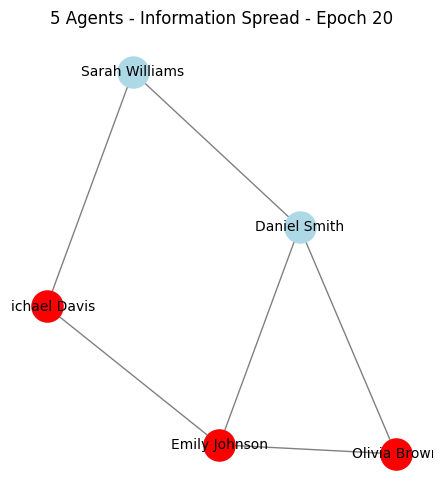

In [4]:
process_experiment(result5, result5_graph, result5_pos)

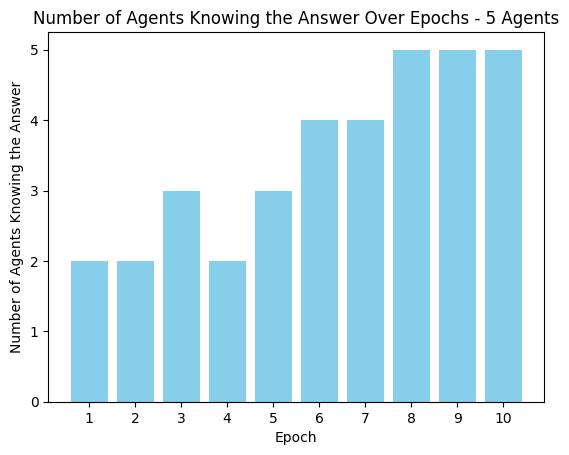

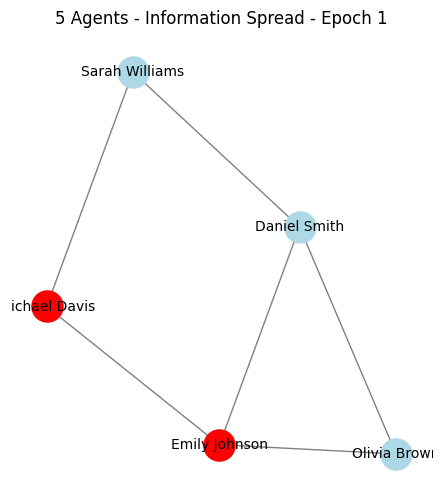

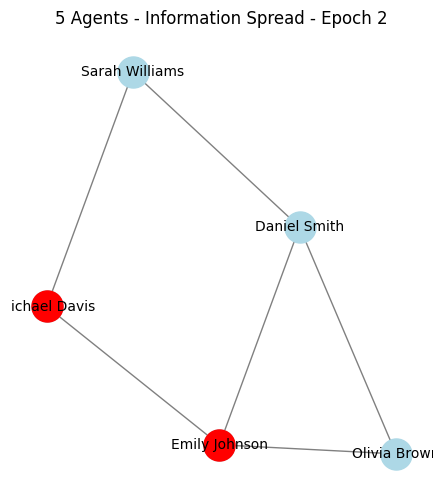

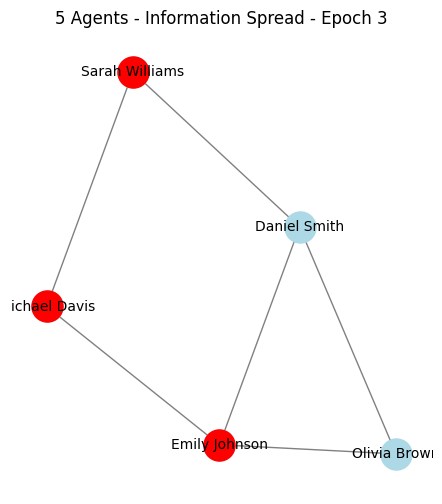

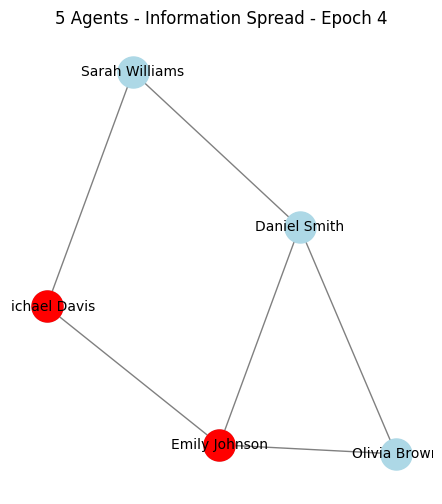

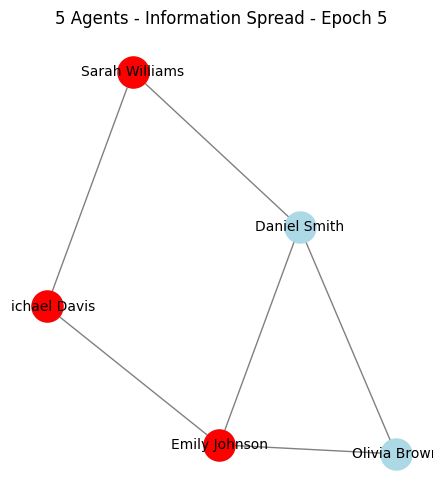

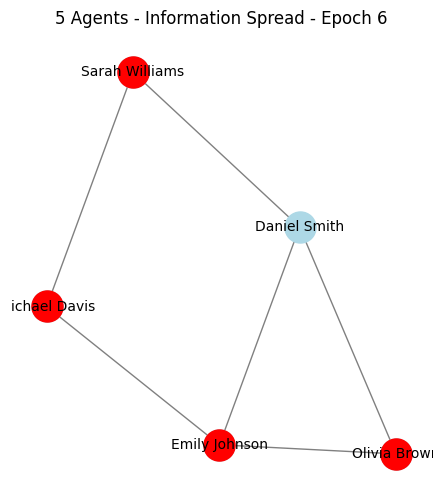

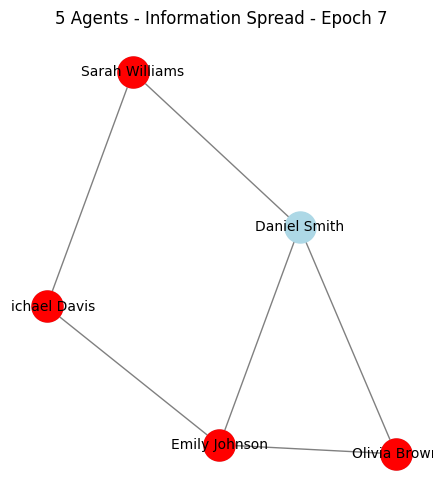

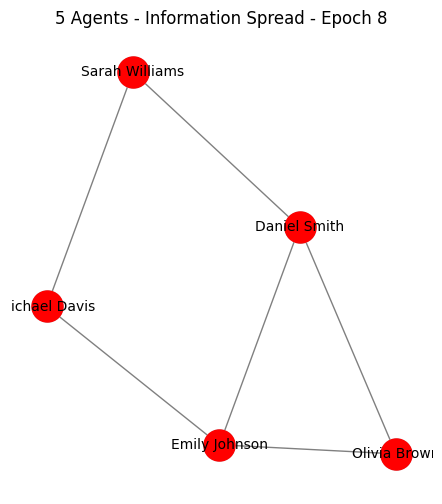

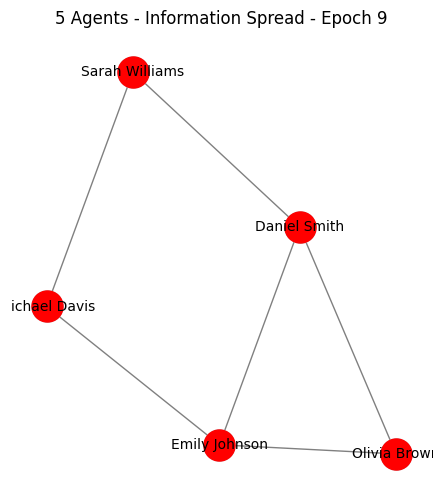

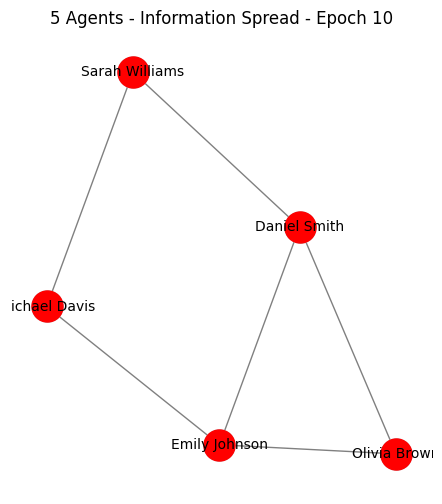

In [5]:
process_experiment(result5_reduced, result5_graph, result5_pos)

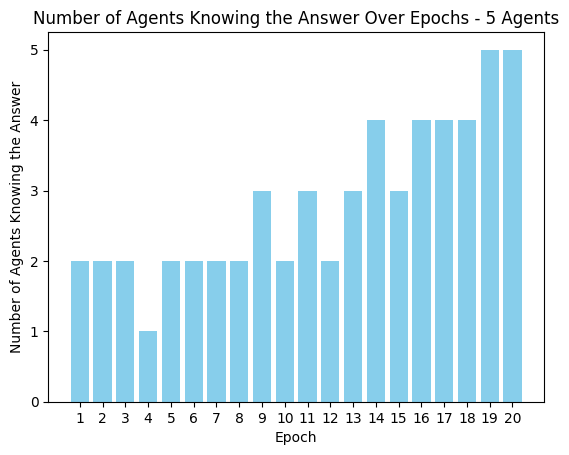

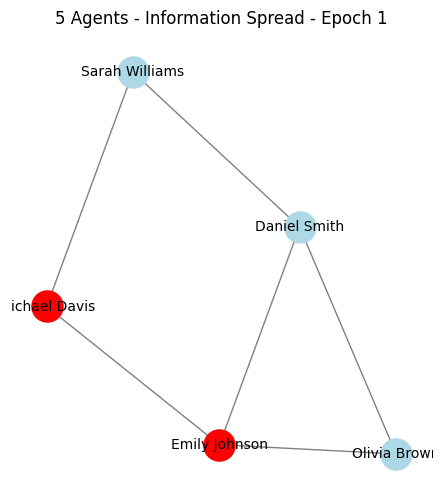

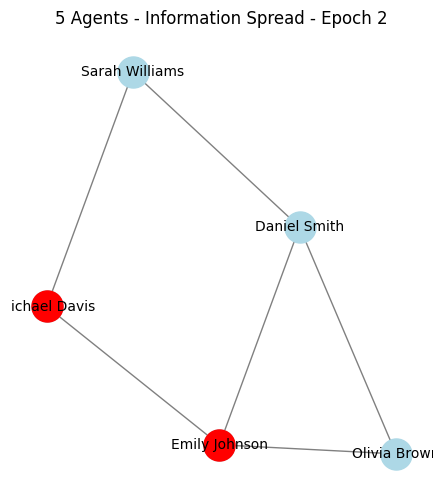

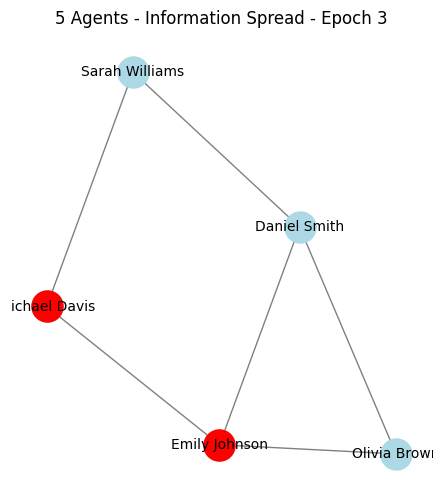

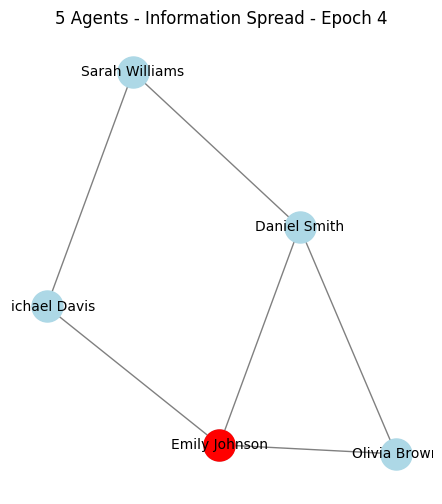

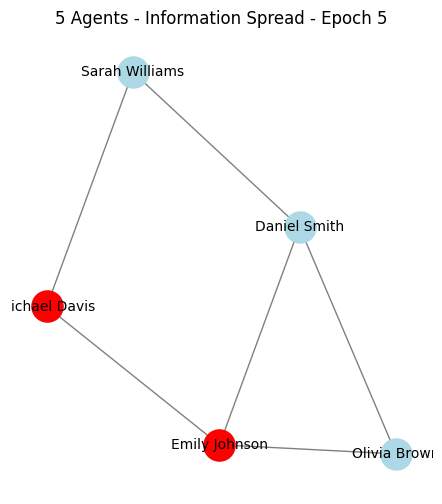

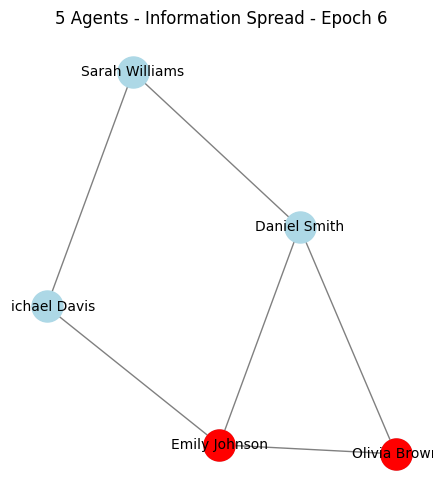

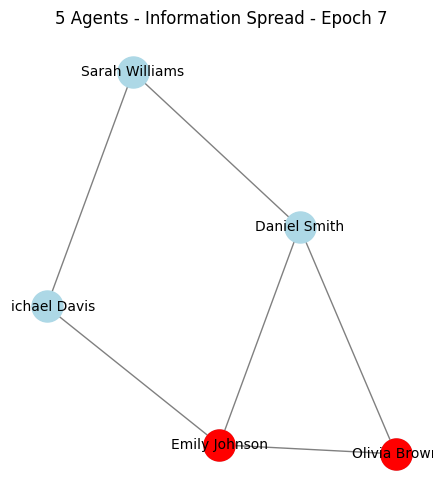

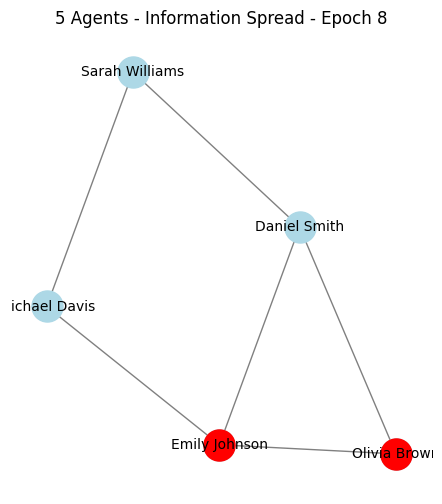

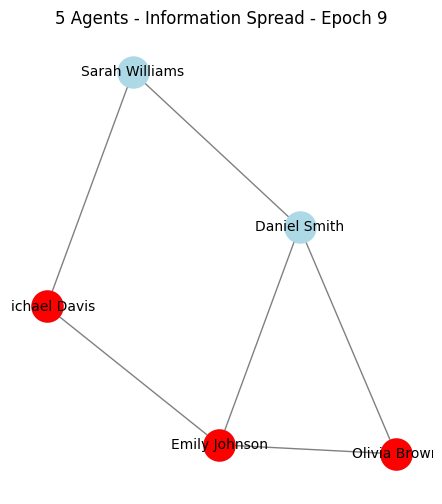

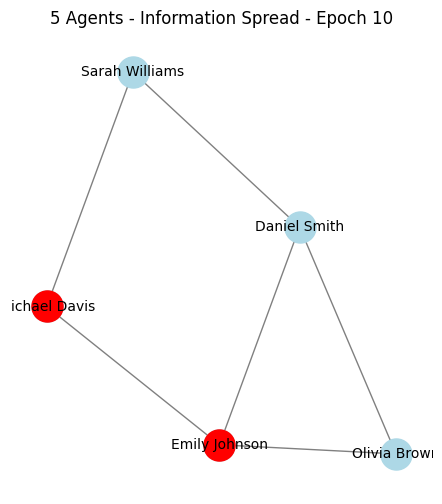

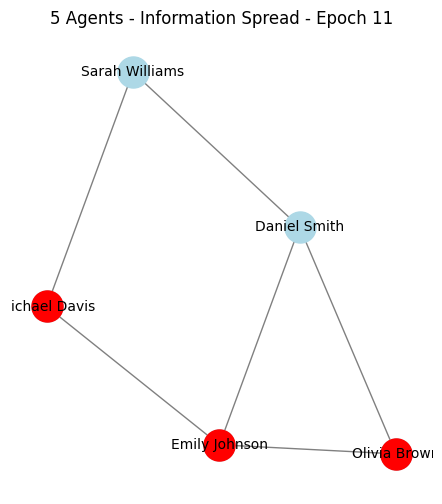

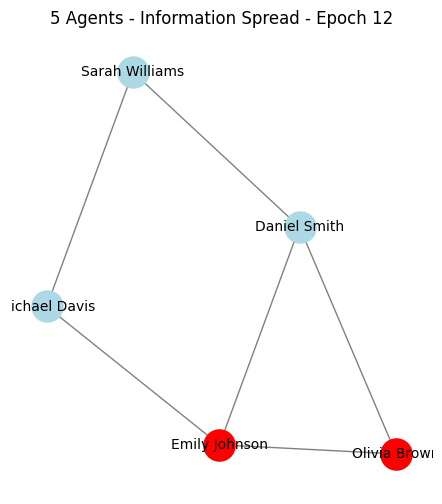

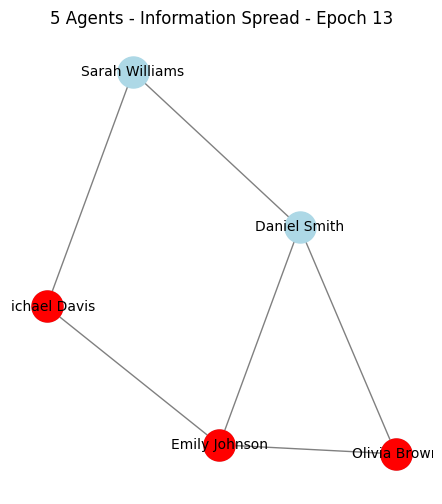

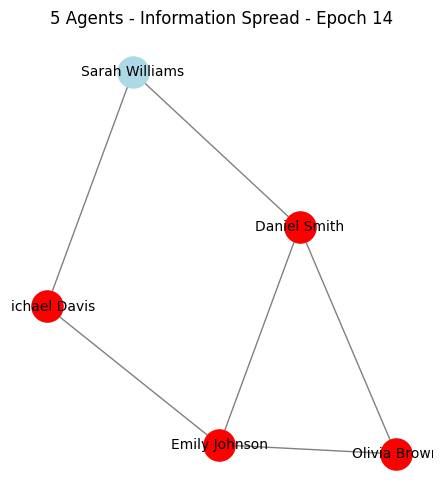

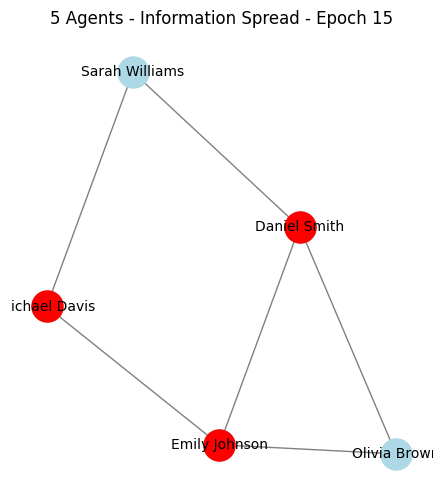

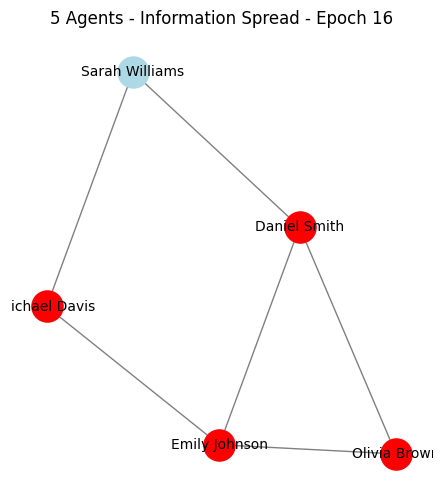

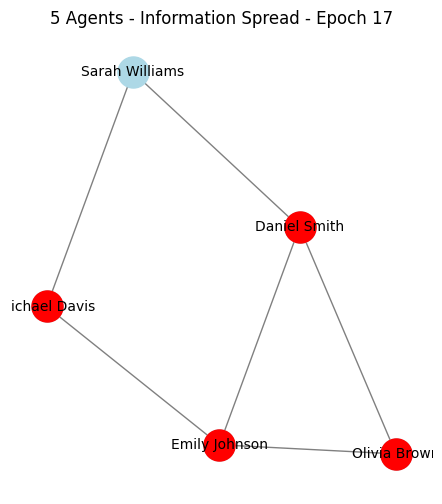

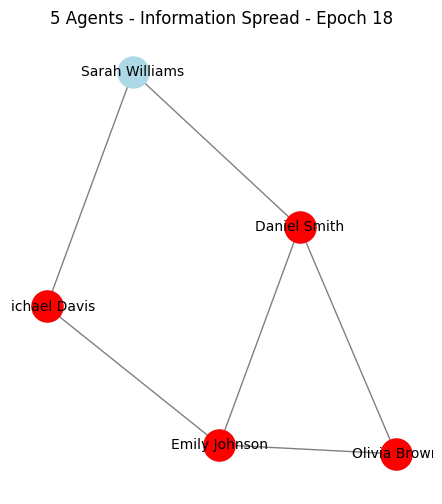

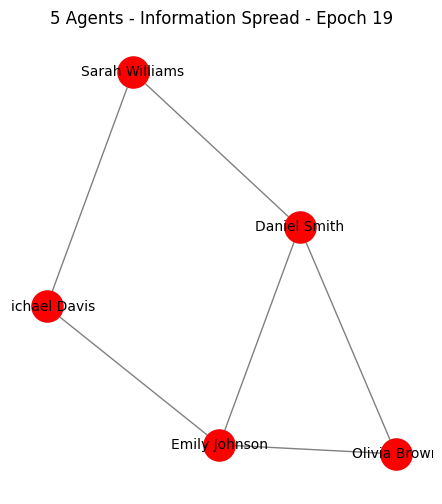

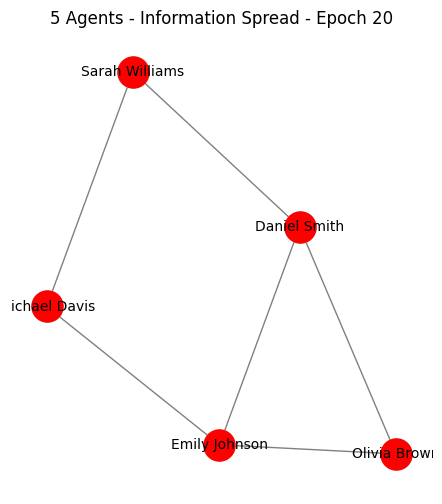

In [6]:
process_experiment(result5_reduced_prompt, result5_graph, result5_pos)

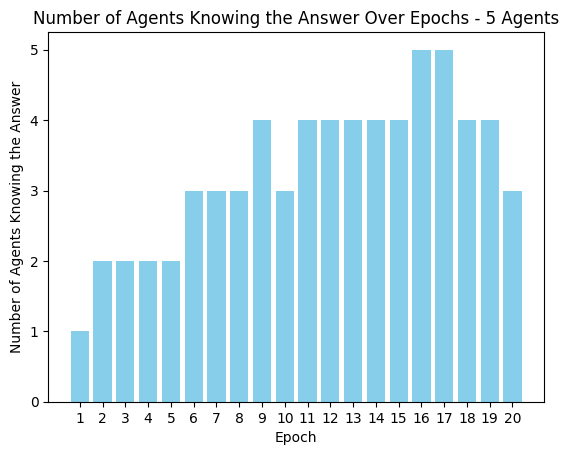

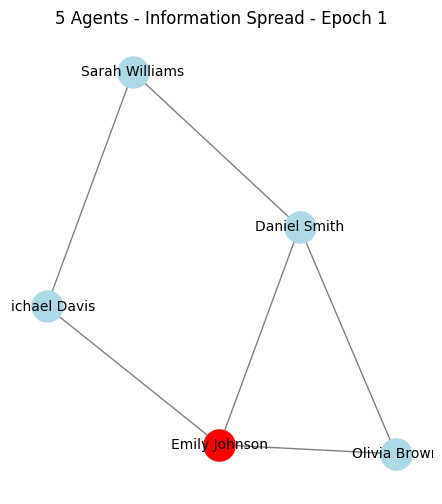

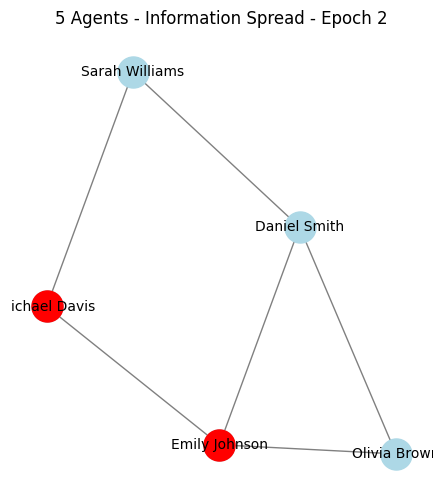

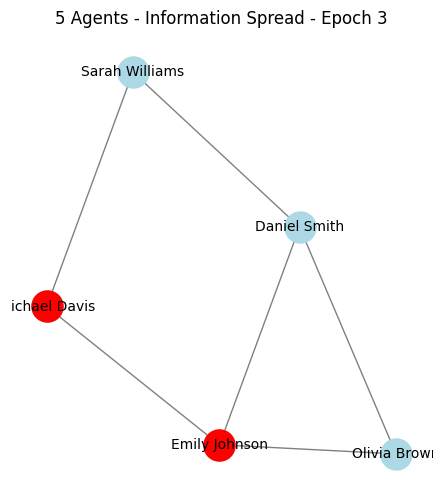

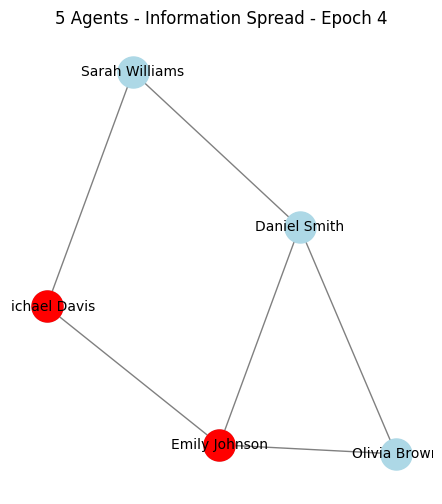

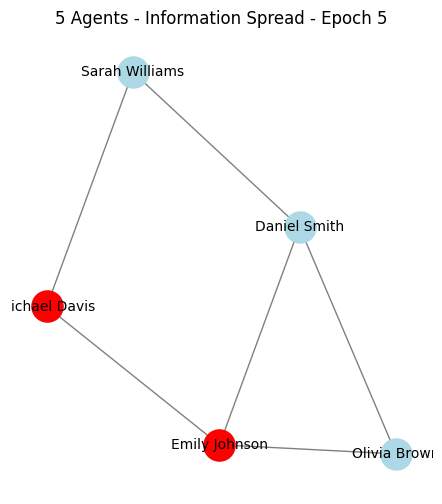

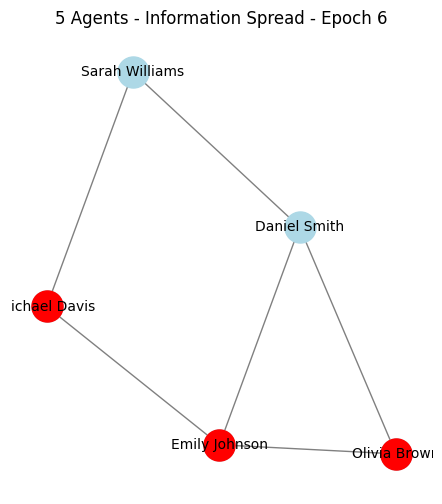

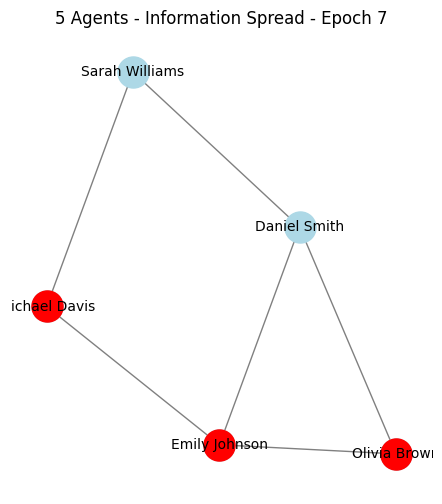

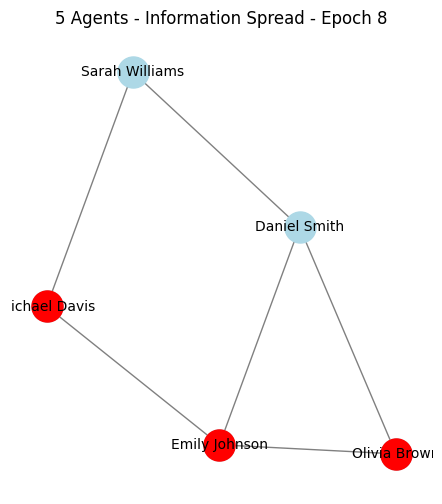

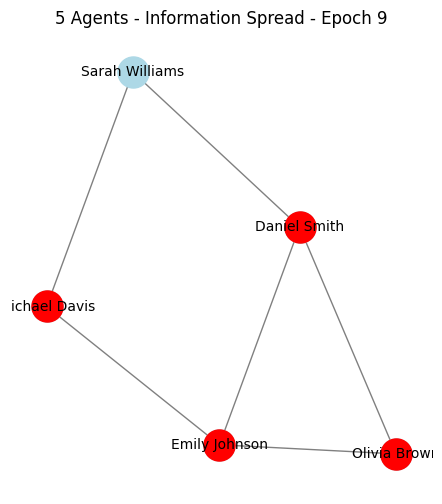

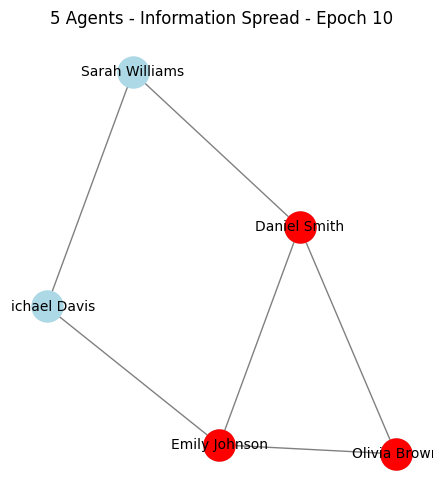

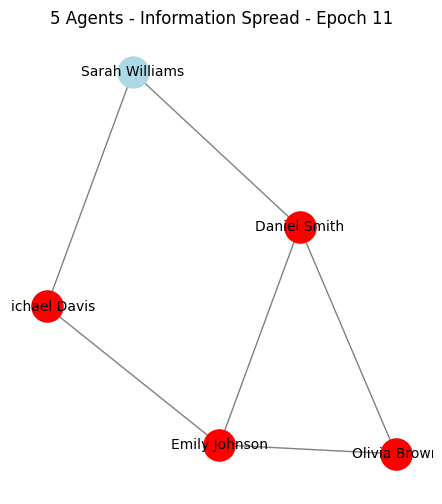

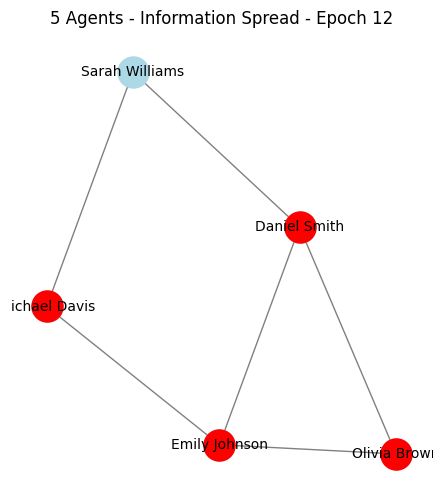

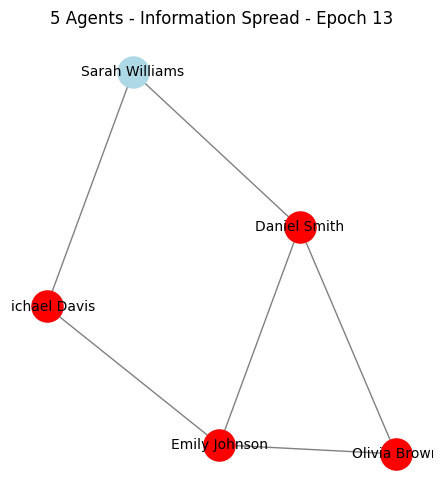

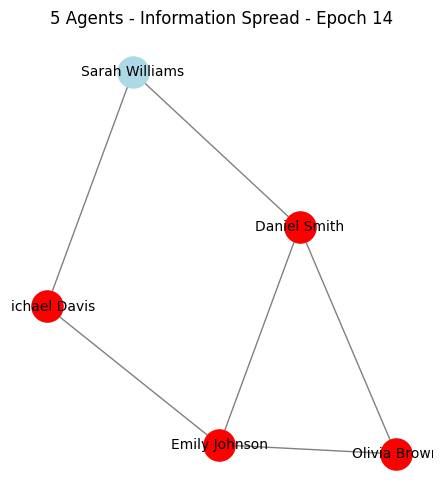

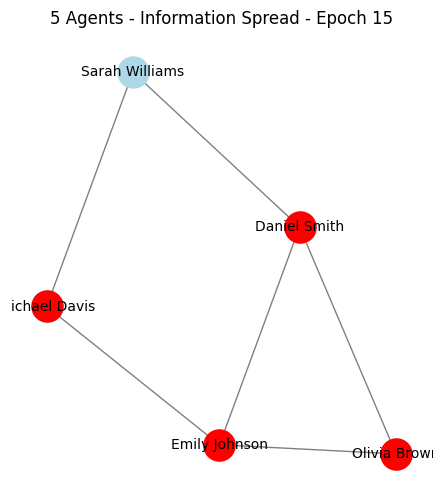

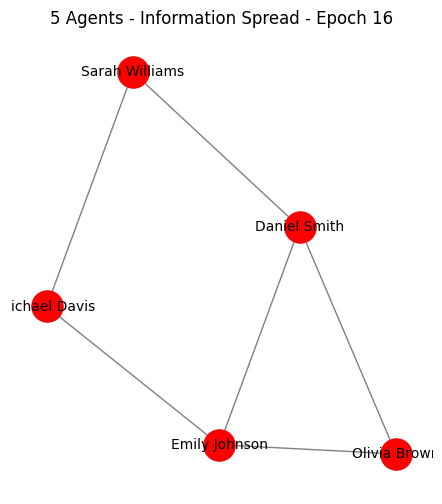

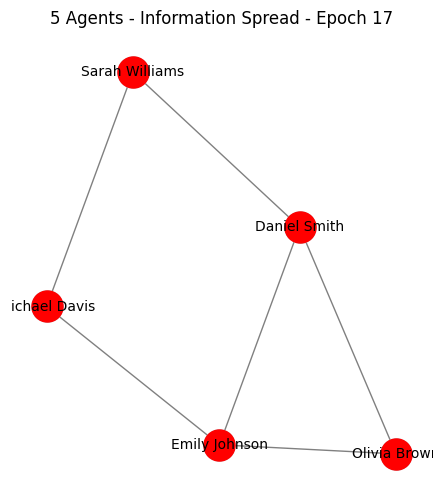

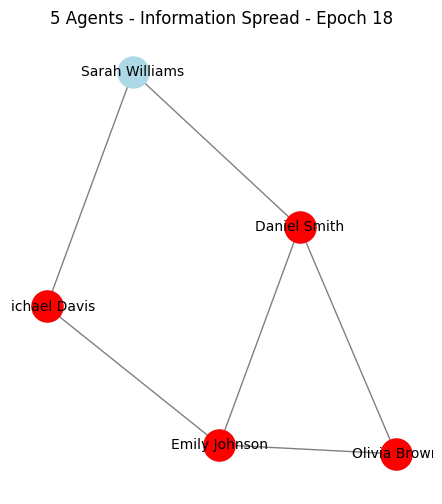

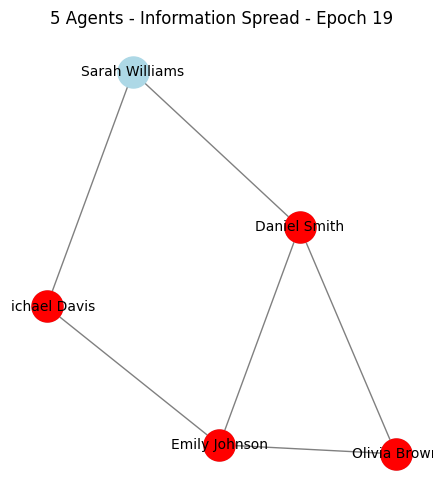

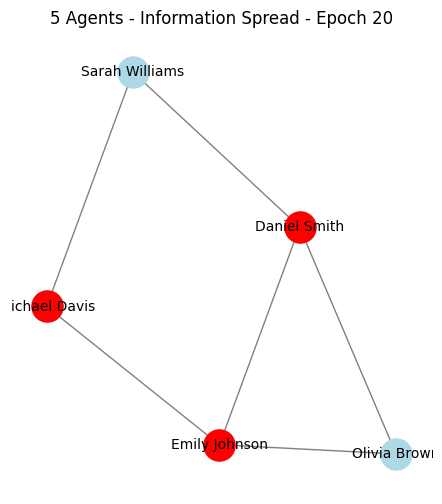

In [7]:
process_experiment(result5_simple, result5_graph, result5_pos)

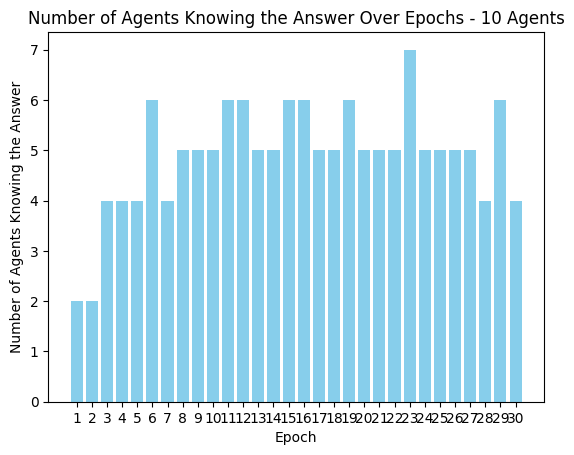

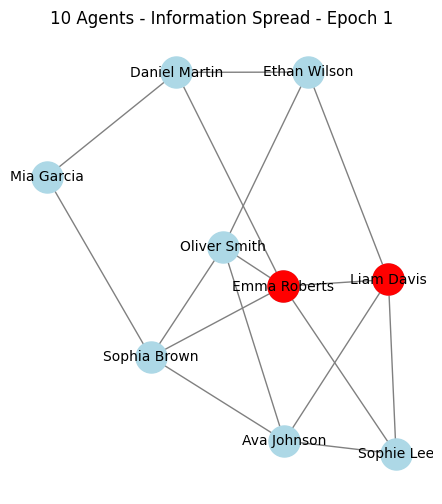

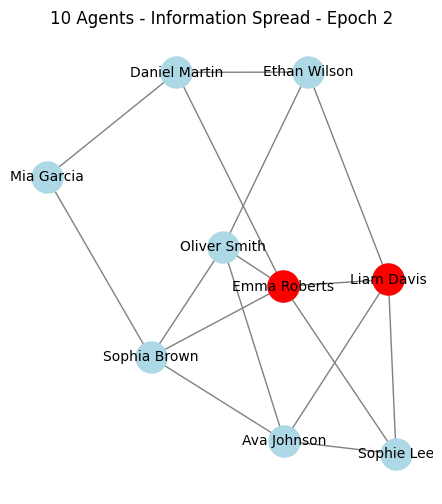

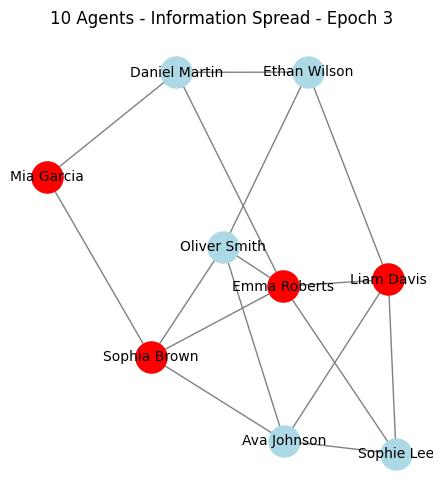

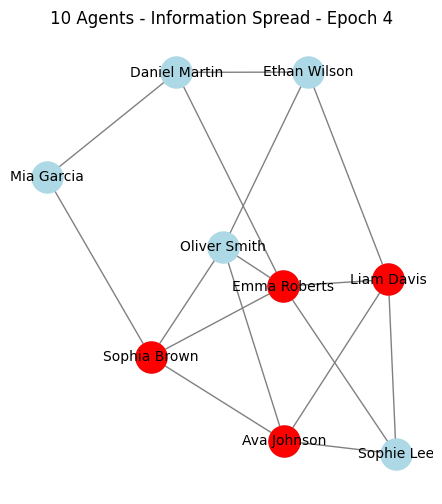

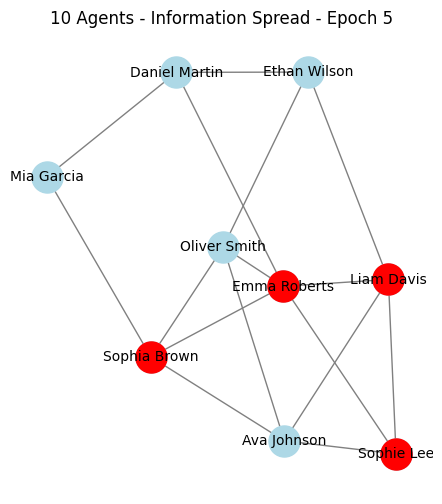

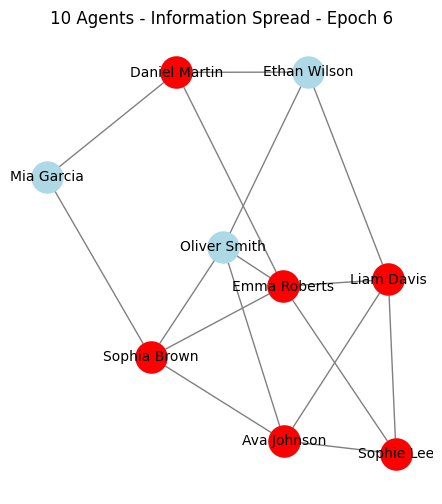

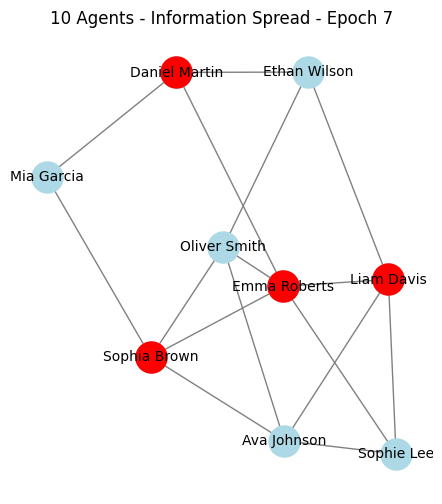

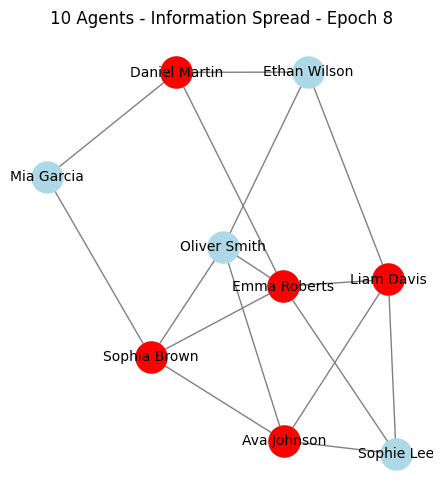

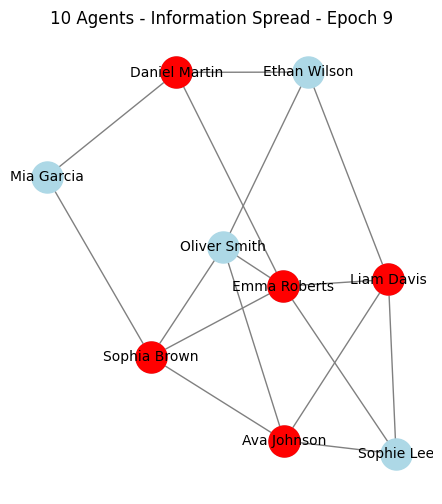

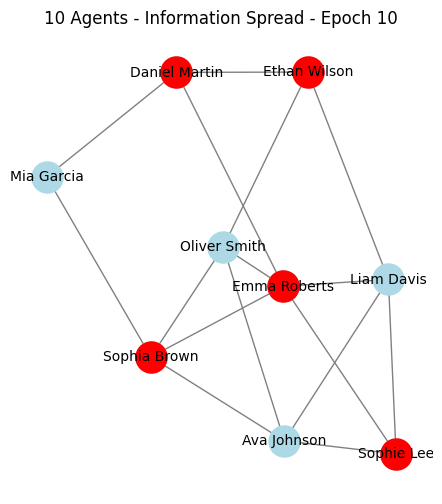

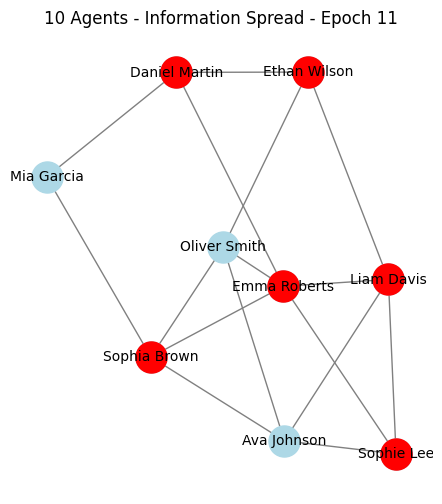

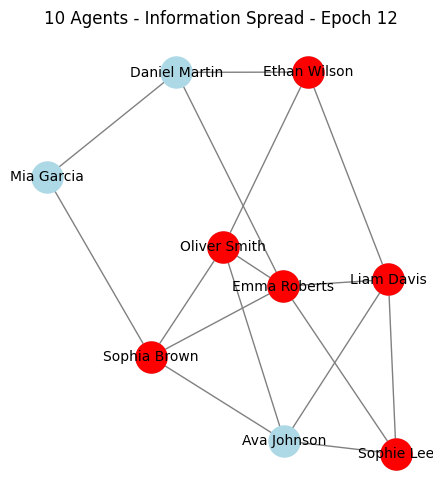

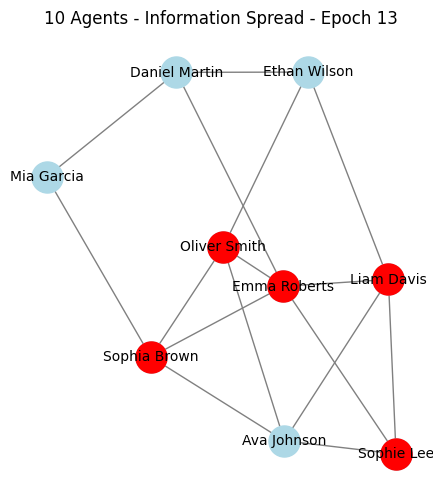

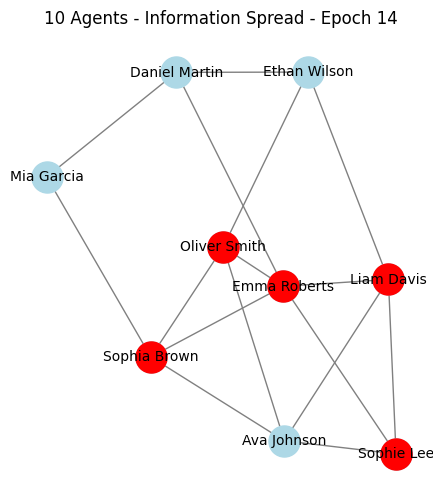

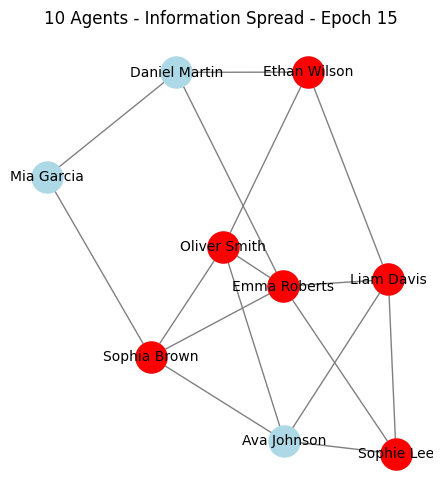

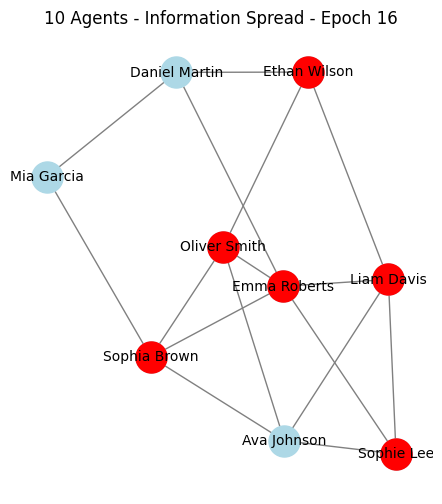

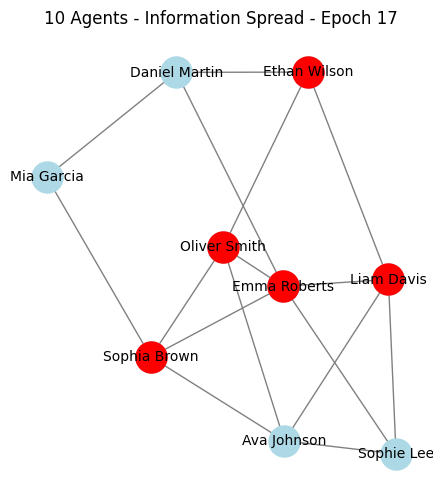

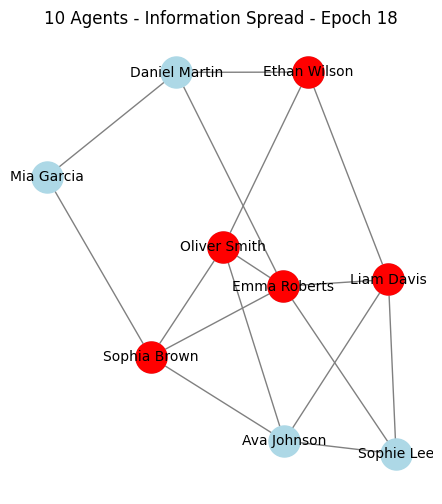

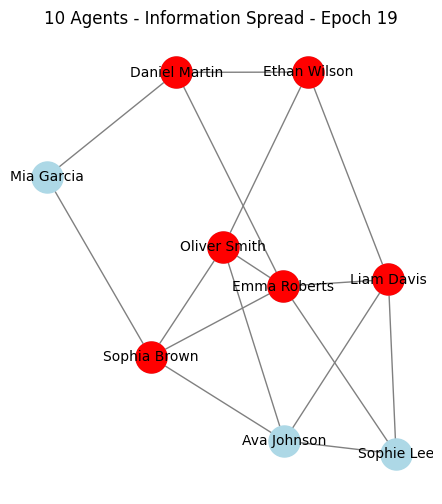

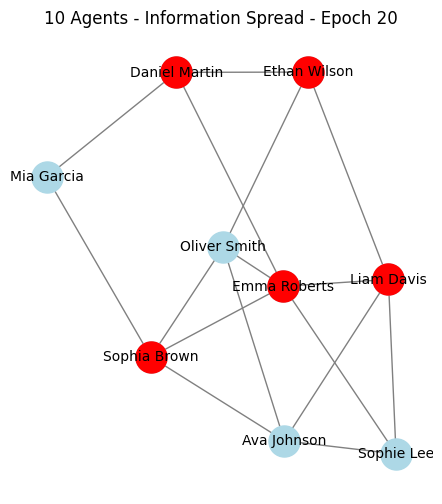

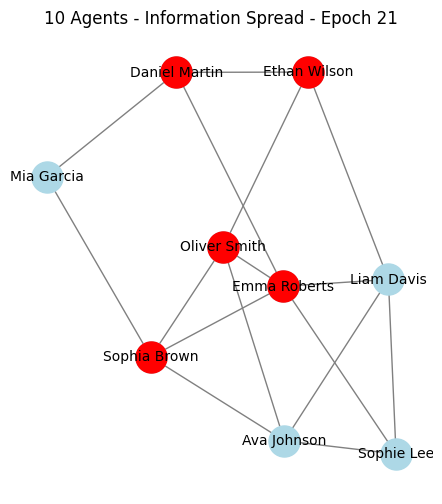

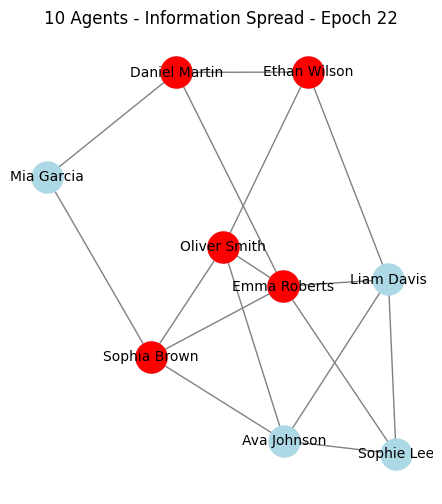

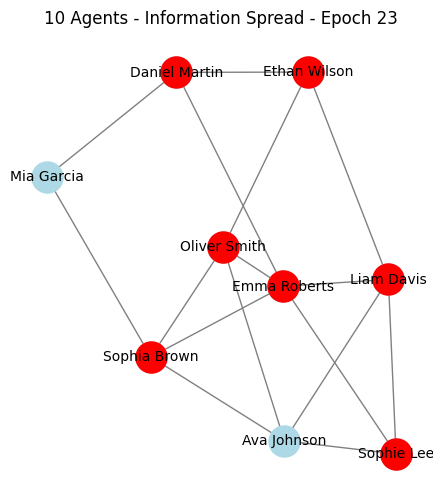

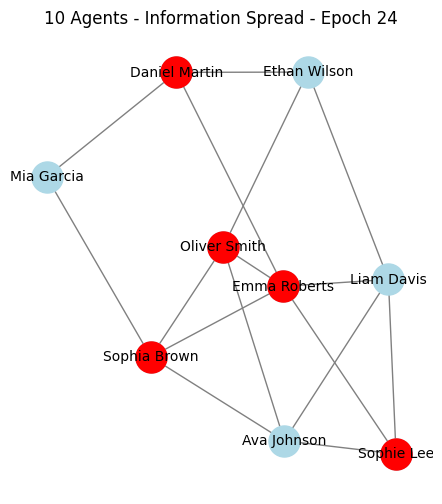

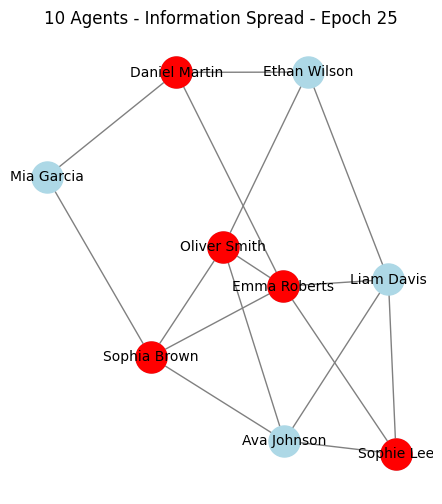

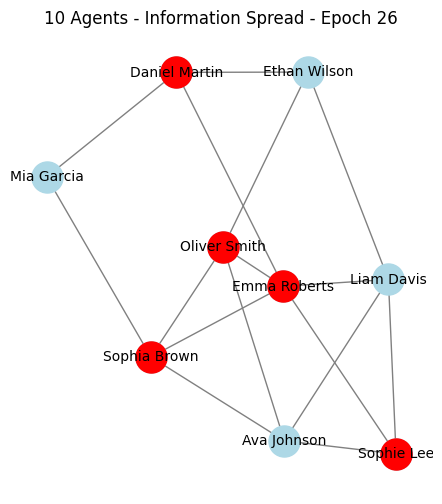

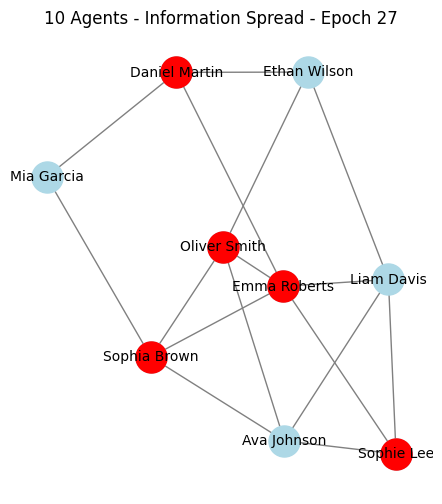

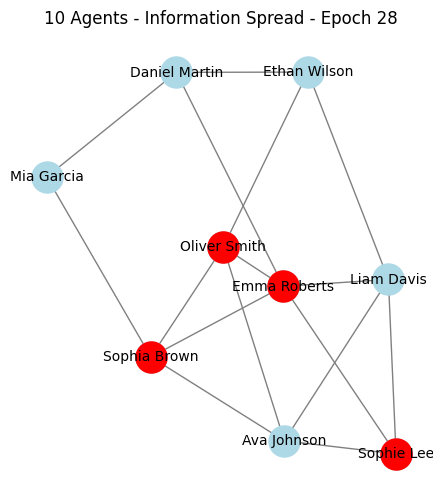

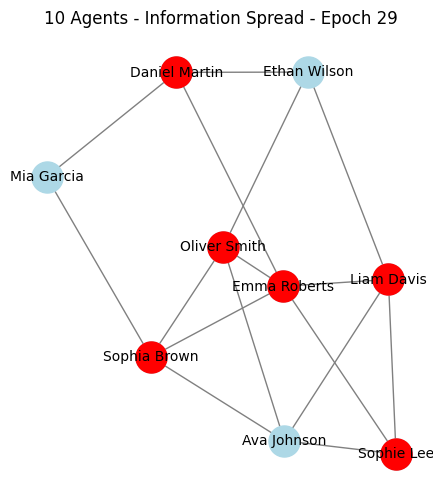

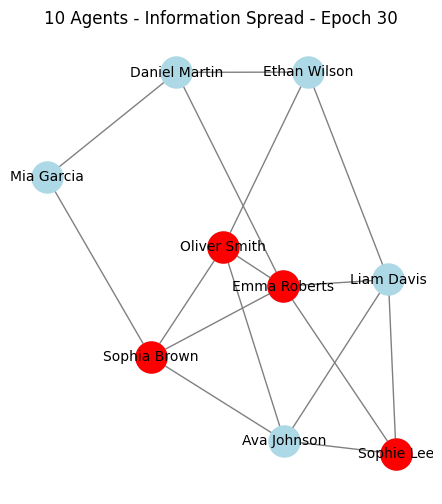

In [8]:
process_experiment(result10, result10_graph, result10_pos)

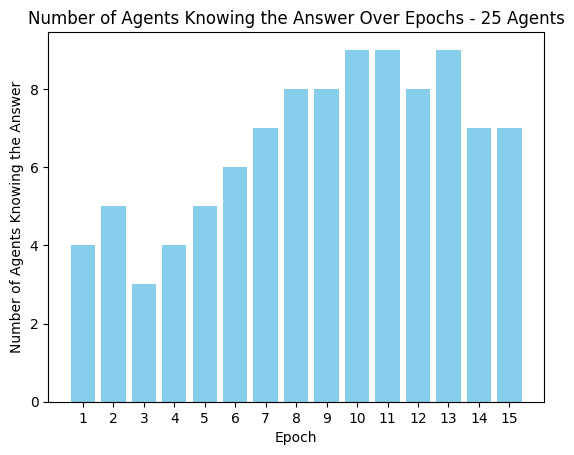

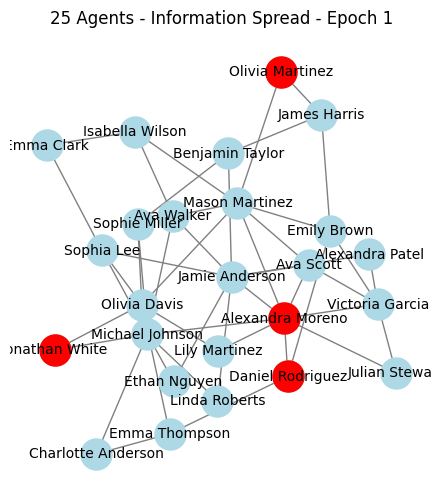

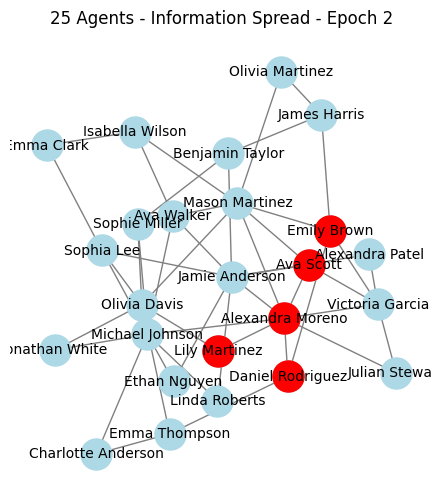

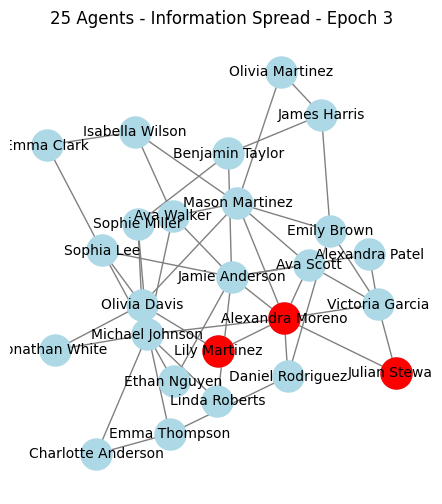

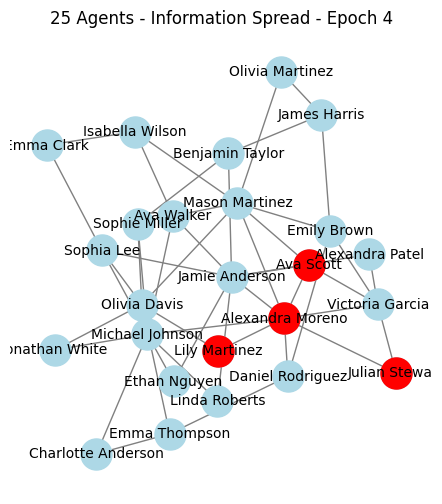

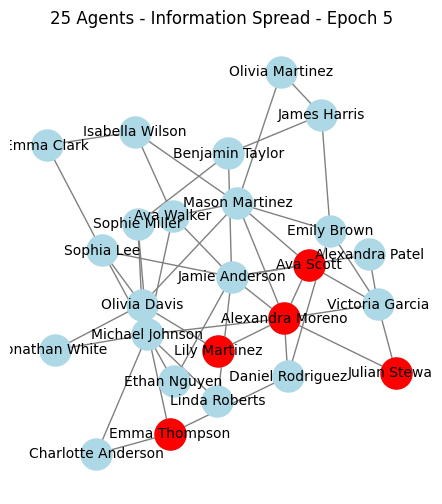

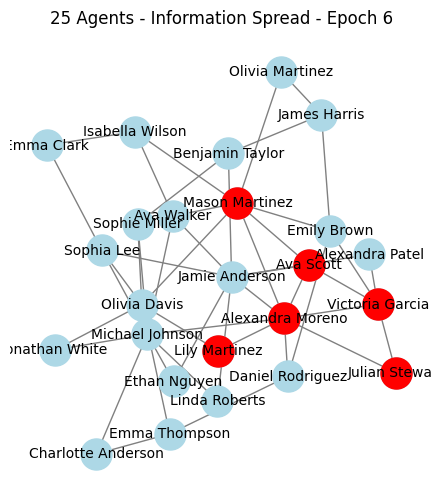

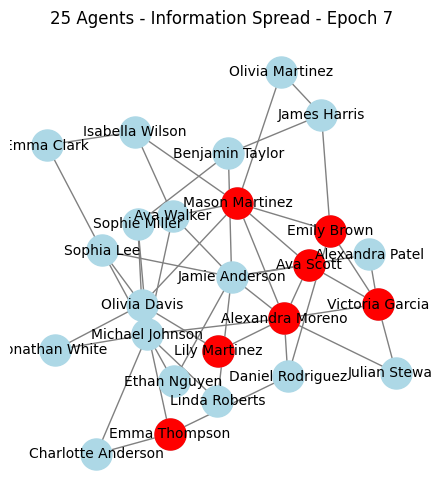

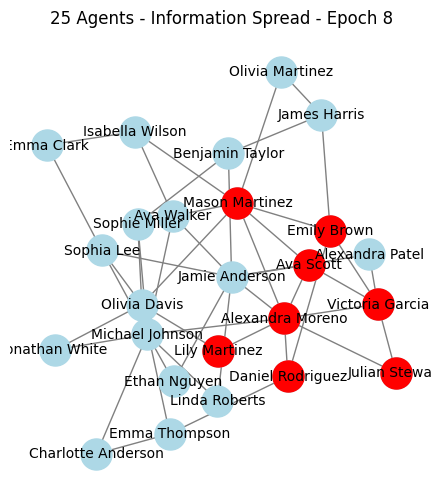

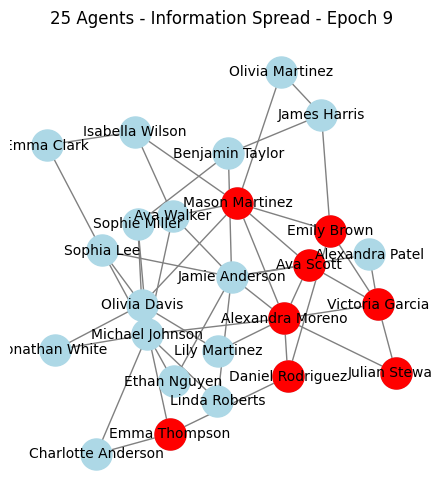

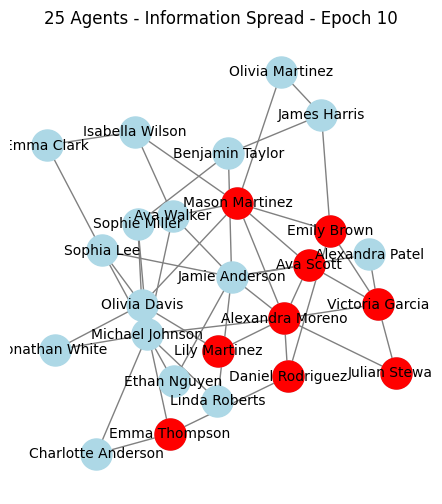

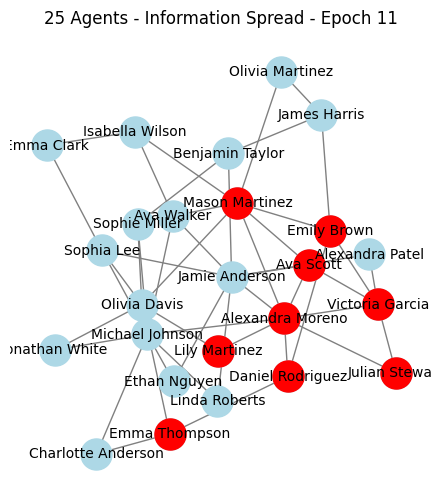

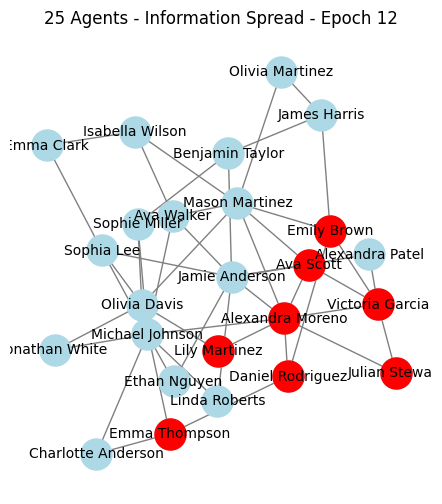

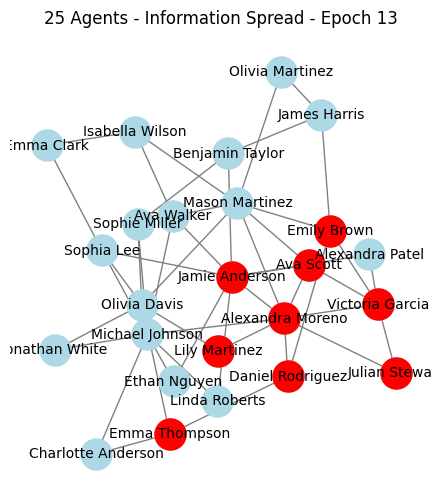

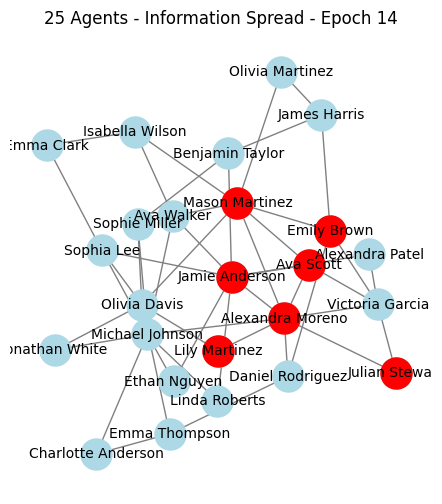

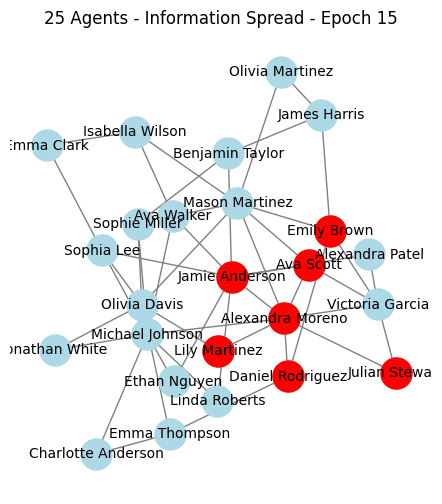

In [9]:
process_experiment(result25, result25_graph, result25_pos)